<a href="https://colab.research.google.com/github/BasiraS/data_analytics_2/blob/main/Python/Unit%204%20-%20Machine%20Learning%20and%20Modeling%20Techniques/Unit4_L3_ML_Advertisement_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Name: Basira Shirzad

# Date: 01-15-2021

# Advertisement Dataset Analysis

You will be working with a fake advertising data set, indicating whether or not a particular internet user clicked on an Advertisement.

Create a model that will predict whether or not they will click on an ad based off the features of that user.

# Import Libraries 

In [ ]:
# Standard Libraries for visualization and data wrangling 
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns; sns.set()
%matplotlib inline

# Logistic Regression Models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

%matplotlib inline

## Get the Data

In [ ]:
# Import pandas library to perform manipulation and analysis on the data
import pandas as pd

In [ ]:
# Import the Advertising data set into a pandas dataframe
ad_data = pd.read_csv('https://raw.githubusercontent.com/niteen11/cuny_lagcc_micro_credential_data_analytics/main/Track%20A/Unit%204%20-%20Machine%20Learning%20and%20Modeling%20Techniques/Dataset/advertising.csv')

In [ ]:
# Check the head of the dataframe to get a clear idea of all the columns in the dataframe
ad_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [ ]:
# Info about the advertisment data frame
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [ ]:
# Description of the advertisment data frame 
ad_data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


## Exploratory Data Analysis

In [ ]:
# Import the seaborn and matplotlib library for plotting and data visualization 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
# Check for missing data in the data frame
ad_data.isnull() 

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False,False,False


* We have boolean values, where true indicates that the value is null and false indicates that the value is not null. Since there are a lot of data, the best thing to do is to use the seaborn library to visualize the null values to make the task easier.

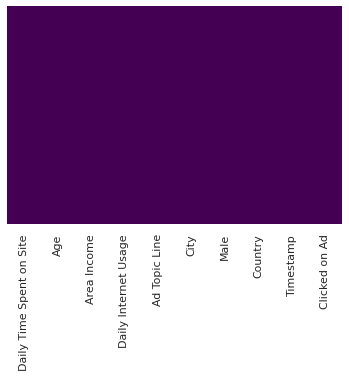

In [ ]:
# Visualize the missing data
sns.heatmap(ad_data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

* There are no null values so our dataset does not require any cleaning. 

# Visualization 

It is good practice to play around with the data and fully exploit the visualization libraries to have fun with the data.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[(0.0, 90.0), (10.0, 70.0)]

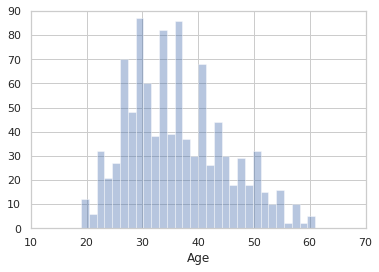

In [ ]:
# The distribution of peoples' age using seaborn
sns.set_style("whitegrid")
sns.distplot(ad_data['Age'].dropna(), kde=False, bins=30).set(xlim=(10, 70), ylim=(0, 90))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


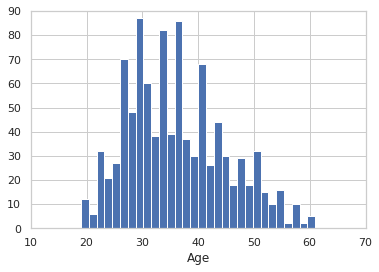

In [ ]:
# The distribution of peoples' age using matplotlib
plt.hist(ad_data['Age'].dropna(), bins=30)
plt.ylim((0,90))
plt.xlim((10, 70))
plt.xlabel('Age')
ax = plt.axes()
ax.set_facecolor("white")

* There is a wide spread of ages between low 20s and low 60s.
* The heighest number of people are in the age of low 30s and high 30s. 

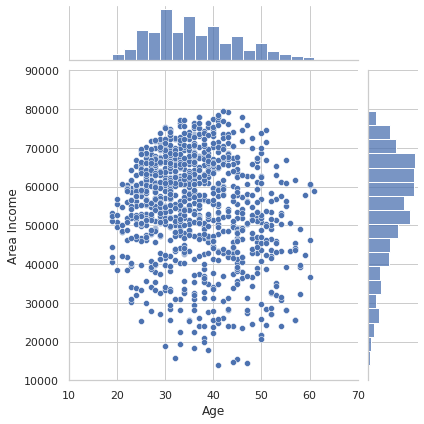

In [ ]:
# Jointplot showing Area Income versus Age
sns.set_style("whitegrid")
sns.jointplot(data=ad_data, x="Age", y="Area Income", xlim = (10,70), ylim = (10000,90000))

* The relationship between age and area income is a bit hard to interpret, however, it does seem that a majority of younger people tend to have a much higher area income compared to those who are a bit older. 

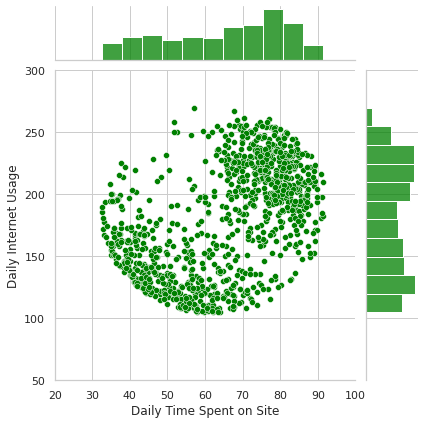

In [ ]:
# Jointplot of 'Daily Time Spent on Site' vs. 'Daily Internet Usage'
sns.set_style("whitegrid")
sns.jointplot(data=ad_data, x="Daily Time Spent on Site", y="Daily Internet Usage", color = 'green', xlim = (20,100), ylim = (50,300))

* The relationship between daily time spent on site and area daily internet usage is somewhat of a positive correlation. The less time spent on site, the less daily internet usage and the more time spent on site, the more daily internet usage.

# Logistic Regression

# Test Tain Split

In [ ]:
# Import from the sklearn library the train_test_split
from sklearn.model_selection import train_test_split

In [ ]:
# Create new variable for the data set that we will spilit
ds = ad_data

In [ ]:
# Configuring inputs and dependable variable
x = ds[['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage', 'Male']]
y = ds['Clicked on Ad']

In [ ]:
# Split the advertisement data frame so you have a portion of data to train the model and then later test the model
# 25% of the data will be tested and 75% of the data will be trained
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0) 

In [ ]:
# Standarize the data of the inputs by to have an efficient machine learning model 
# Standard Scaler subtracts the mean and then scales to unit variance, which is  dividing all the values by the standard deviation.
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Training and Predicting 

In [ ]:
# Import from the sklearn library the logistic regression to build the model
from sklearn.linear_model import LogisticRegression

In [ ]:
# Build the Logistic Regression Model
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# Store the prediction result of the Logistic Regression Model 
y_pred = logmodel.predict(X_test)

# Classification Report

In [ ]:
# Import from the sklearn library the classification report to view the evaluation of the model
from sklearn.metrics import classification_report

In [ ]:
# Check the evaluation of the Logistic Regression Model 
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       136
           1       0.99      0.96      0.98       114

    accuracy                           0.98       250
   macro avg       0.98      0.98      0.98       250
weighted avg       0.98      0.98      0.98       250



# Confusion Matrix

In [ ]:
# Import from the sklearn library the confusion matrix to view the performance of the model
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[135   1]
 [  4 110]]


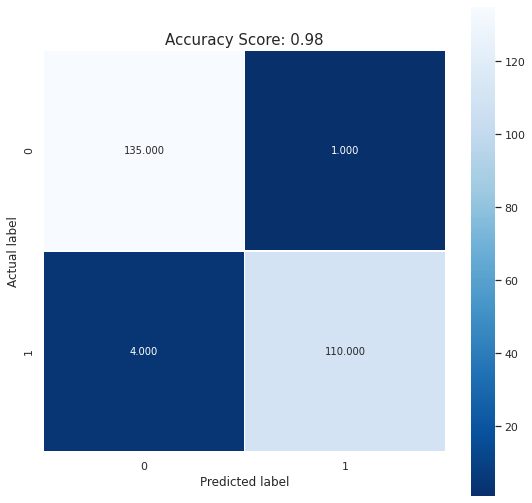

In [ ]:
# View the confusion matrix of the Logistic Regression Model 
plt.figure(figsize=(9,9))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(logmodel.score(X_test, y_test))
plt.title(all_sample_title, size = 15);

In [ ]:
# Import from the sklearn library metrics to measure the classification performance
from sklearn import metrics

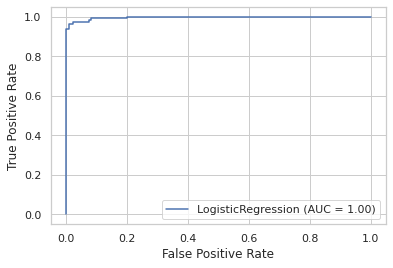

In [ ]:
# View classification performance
metrics.plot_roc_curve(logmodel, X_test, y_test)  

# Observation

There was a total of 250 people (250 people were being tested to see if they will click on the ad). Out of those 250 cases, the model predicted "yes" 111 times and "no" 139 times. In reality, 136 people did not click on the ad in the sample and 114 people did click on the ad. 

* **Accuracy**: Overall, the model was correct 98% of the time.

* **Misclassification Rate**: Overall, the model was incorrect 2% of the time.

* **True Positive Rate**: 96.5% of the time the model predicted that the people will click on the ad and they actually did click on the ad.

* **False Positive Rate**: 0.7% of the time the model predicted that the people will click on the ad, but they actually did not click on the ad.

* **True Negative Rate**: 99.3% of the time the model predicted that the people will not click on the ad and they actually did not click on the ad.

* **False Negative Rate**: 3.5% of the time the model predicted that the people will not click on the ad, but they actually did click on the ad.

False Positve is Type I Error & False Negative is Type II Error

# Conclusion

Overall, this model was strong in predicting the chances of a person clicking on an ad or not clicking on an ad. This model had a precision of 98%, which makes it accurate 98% of the time on what we are testing it on. The recall, which compares the people that the model said clicked on the ad to the total amount of people that actaully clicked on the ad has a 98% confidence.